# This notebook will serve for the initial EDA for the ratings data for the TFW project

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in the dataset

rating = pd.read_csv('/Users/petermcisaac/neue-fische-traum/traum-preis/datasets/rating_20210707.csv')

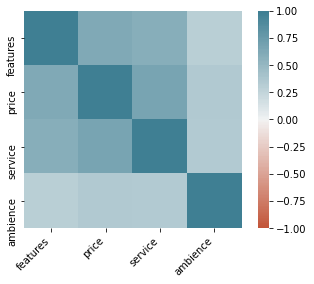

In [3]:
# generate the heatmap

corr = rating.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [38]:
corr.style.background_gradient(cmap='coolwarm')

,features,price,service,ambience
features,1.000000,0.618268,0.581604,0.298260
price,0.618268,1.000000,0.671694,0.359136
service,0.581604,0.671694,1.000000,0.351328
ambience,0.298260,0.359136,0.351328,1.000000


# there are high correlations for many of these variables, but in this case, this should not be surprising

In [4]:
rating.head()


,rating_date,listing_id,features,price,service,ambience,date_from,date_to
0,2012-09-16,fbd74bce-23dd-53e7-b988-8beb85160d6f,5,5,5,5,2012-09-09,2012-09-15
1,2012-10-20,fbd74bce-23dd-53e7-b988-8beb85160d6f,4,5,5,5,2012-10-06,2012-10-13
2,2014-06-17,fbd74bce-23dd-53e7-b988-8beb85160d6f,5,5,5,5,2013-08-31,2013-09-07
3,2014-10-15,b766fc7c-6d44-5c86-b6d1-3f699c78b3a6,4,5,5,4,2014-10-09,2014-10-12
4,2015-08-19,b766fc7c-6d44-5c86-b6d1-3f699c78b3a6,4,5,5,5,2015-08-10,2015-08-17


In [6]:
# convert rating_date, date_from and data_to to datetime 

rating['rating_date'] = pd.to_datetime(rating['rating_date'])


In [7]:
rating.head()


,rating_date,listing_id,features,price,service,ambience,date_from,date_to
0,2012-09-16,fbd74bce-23dd-53e7-b988-8beb85160d6f,5,5,5,5,2012-09-09,2012-09-15
1,2012-10-20,fbd74bce-23dd-53e7-b988-8beb85160d6f,4,5,5,5,2012-10-06,2012-10-13
2,2014-06-17,fbd74bce-23dd-53e7-b988-8beb85160d6f,5,5,5,5,2013-08-31,2013-09-07
3,2014-10-15,b766fc7c-6d44-5c86-b6d1-3f699c78b3a6,4,5,5,4,2014-10-09,2014-10-12
4,2015-08-19,b766fc7c-6d44-5c86-b6d1-3f699c78b3a6,4,5,5,5,2015-08-10,2015-08-17


In [8]:
print (rating.dtypes)

rating_date    datetime64[ns]
listing_id             object
features                int64
price                   int64
service                 int64
ambience                int64
date_from              object
date_to                object
dtype: object


In [16]:
rating['date_to'] = pd.to_datetime(rating['date_to'], errors = 'coerce')

In [17]:
rating['date_from'] = pd.to_datetime(rating['date_from'], errors = 'coerce')

In [18]:
# get the master list of all properties. read in listings dataset

listings = pd.read_csv('/Users/petermcisaac/neue-fische-traum/traum-preis/datasets/listings_20210707.csv')



In [19]:
listings.head()

,listing_id,customer_id,state,contract_end,zip,country_title,region,subregion,holiday_region,property_type,...,sauna,grill,garden,terrace,balcony,bathrooms,bedrooms,max_guests,pets,living_area
0,97232bc1-cee6-54cc-9965-be13177051d3,6e5e6ab0-34d3-5662-9259-7ae7eb021acb,Online,2022-05-01,182--,Deutschland,Ostsee,Mecklenburgische Ostseeküste,Ostsee,holiday_apartment,...,yes,yes,yes,no,yes,1.0,2.0,4.0,0.0,60
1,b2e43b01-0a74-5270-95db-e4f649982e72,6e5e6ab0-34d3-5662-9259-7ae7eb021acb,Online,2022-05-01,875--,Deutschland,Allgäu,Oberallgäu,Oberallgäu,holiday_apartment,...,yes,yes,yes,no,yes,1.0,1.0,4.0,0.0,50
2,892f4fda-e0e8-5a9b-bbed-29f82942ff9a,6e5e6ab0-34d3-5662-9259-7ae7eb021acb,Online,2022-05-01,237--,Deutschland,Ostsee,Lübecker Bucht,Ostsee,holiday_apartment,...,yes,yes,yes,yes,no,1.0,2.0,6.0,0.0,77
3,e190ea0f-c688-5aa8-ae38-d0aeebdeec65,6e5e6ab0-34d3-5662-9259-7ae7eb021acb,Online,2022-05-01,274--,Deutschland,Nordsee,Cuxhaven & Umgebung,Nordsee,holiday_apartment,...,yes,yes,yes,no,yes,1.0,2.0,6.0,0.0,80
4,67e29a5f-1299-535c-ab06-d5c3ae750e9f,350d46c1-2a43-5053-a33c-40cd3a4c8b95,Online,2022-04-01,243--,Deutschland,Ostsee,Geltinger Bucht,Ostsee,holiday_apartment,...,yes,yes,yes,yes,no,1.0,2.0,4.0,0.0,60


In [20]:
properties = listings['listing_id']

In [21]:
properties.head()


0    97232bc1-cee6-54cc-9965-be13177051d3
1    b2e43b01-0a74-5270-95db-e4f649982e72
2    892f4fda-e0e8-5a9b-bbed-29f82942ff9a
3    e190ea0f-c688-5aa8-ae38-d0aeebdeec65
4    67e29a5f-1299-535c-ab06-d5c3ae750e9f
Name: listing_id, dtype: object

In [34]:
rating_all_properties = pd.merge(properties, rating, on="listing_id", how='outer')

In [35]:
rating_all_properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362767 entries, 0 to 362766
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   listing_id   362767 non-null  object        
 1   rating_date  353506 non-null  datetime64[ns]
 2   features     353506 non-null  float64       
 3   price        353506 non-null  float64       
 4   service      353506 non-null  float64       
 5   ambience     353506 non-null  float64       
 6   date_from    348459 non-null  datetime64[ns]
 7   date_to      348461 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(4), object(1)
memory usage: 24.9+ MB


In [36]:
rating_all_properties.isnull().sum()

listing_id         0
rating_date     9261
features        9261
price           9261
service         9261
ambience        9261
date_from      14308
date_to        14306
dtype: int64

In [37]:
rating.isnull().sum()

rating_date       0
listing_id        0
features          0
price             0
service           0
ambience          0
date_from      5047
date_to        5045
dtype: int64